# Handmade TI

The advantage of MPS is that one can draw, using for example some CAD software, the TI that best suits the idea of heterogeneity that an expert has about the site.

In 2D, this can be easily done using a paint software, like for example the free and open source [GIMP](https://www.gimp.org/).

As usual, import the required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# import package 'geone'
import geone as gn

## Hand-drawing a 2D TI

If you are using GIMP, the workflow to obtain a training image from an image file is the following:

1. Create a new image. The size of the image (*width* and *height*, that is `nx` and `ny`) represent the number of cells along the $x$ and the $y$ axis of your domain. For this toy example, you can use a relatively small image, for example something like $300{\times}200$.
2. Draw some patterns with a unique colour on the white background.
3. From `Image > Mode` select `indexed`, and set the `Maximum number of colors` to `2`. Alternatively, you can also leave `Grayscale`.
4. Then export the file as *PGM* image file, using the *ASCII* option (`File > Export as... > `).
5. Now your *PGM* can be opened with a text editor.

If you are using another software, the overall procedure should be very similar.

### PGM brief description

The PGM ASCII file contains the greyscale description of your paint. The file contains a number of rows equal to `nx`${\times}$`ny`+4.  
The first four rows contain

1. a code to describe the version of PGM;
2. a simple description comment, starting with `#`;
3. two integer numbers representing the widht and the height of the image;
4. the maximum number of the grey scale, that should go from `0` to `255`.

The remaining `nx`${\times}$`ny` rows contains the image in a unique column.  
Given this pieces of information, it is then easy to read it with Python and set the values of a geone `Image` object type.

The first step is to load the information as a TXT file:

In [2]:
hand = np.loadtxt("test.pgm", skiprows=4, unpack=True)

Then, it is also useful to get the unique values, that can then be replaced with more "simple" codes, for example 0 and 1.

In [3]:
print(np.unique(hand))

[ 39. 255.]


These unique values found in the image can be replaced by 0 and 1, and an object of type `Image` can be set up.

*** Img object ***
name = ''
(nx, ny, nz) = (300, 200, 1) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['hand']
val: (1, 1, 200, 300)-array
*****

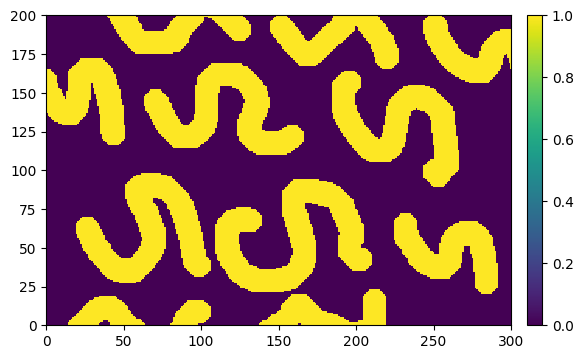

In [4]:
# Replace with simpler codes
hand[hand==39] = 1
hand[hand==255] = 0

# Find again the unique codes (should be only 0 and 1)
categ_val = np.unique(hand)

# This is the size of the image
nx = 300
ny = 200
nz = 1

# Set up the input image in a Image object
ti = gn.img.Img(nx=nx, ny=ny, nz=nz, nv=1, val=np.reshape(hand, (nz,ny,nx)), varname="hand")
gn.imgplot.drawImage2D(ti)
ti

## Simulation grid

Define the simulation grid (number of cells in each direction, cell unit, origin). Here `nx` and `ny` should be the ones set up in your image.

In [5]:
nx, ny, nz = ti.nx, ti.ny, ti.nz #00, 100, 1         # number of cells
sx, sy, sz = ti.sx, ti.sy, ti.sz # cell unit
ox, oy, oz = 0.0, 0.0, 0.0       # origin (corner of the "first" grid cell)

## DS input parameters

Here we can leave the same values used and explained in the previous notebook (`mps01_basic.ipynb`). The only difference is that in this case hard data are not considered.

In [6]:
nreal = 20
deesse_input = gn.deesseinterface.DeesseInput(
    nx=nx, ny=ny, nz=nz,        # dimension of the simulation grid (number of cells)
    sx=sx, sy=sy, sz=sz,        # cells units in the simulation grid
    ox=ox, oy=oy, oz=oz,        # origin of the simulation grid
    nv=1, varname='hand',       # number of variable(s), name of the variable(s)
    TI=ti,                      # TI (class gn.deesseinterface.Img)
    distanceType='categorical', # distance type: proportion of mismatching nodes (categorical var., default)
    #conditioningWeightFactor=10.,  # put more weight to conditioning data (if needed)
    nneighboringNode=24,        # max. number of neighbors (for the patterns)
    distanceThreshold=0.05,     # acceptation threshold (for distance between patterns)
    maxScanFraction=0.25,       # max. scanned fraction of the TI (for simulation of each cell)
    npostProcessingPathMax=1,   # number of post-processing path(s)
    seed=444,                   # seed (initialization of the random number generator)
    nrealization=nreal)         # number of realization(s)

## Run the DS simulation

(same as for `mps01_basic.ipynb`.

In [7]:
deesse_output = gn.deesseinterface.deesseRun(deesse_input, nthreads=8)

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230914 / OpenMP 8 thread(s)]
DeeSse run complete


## Retrieve the results and display

(same as `mps01_basic.ipynb`)

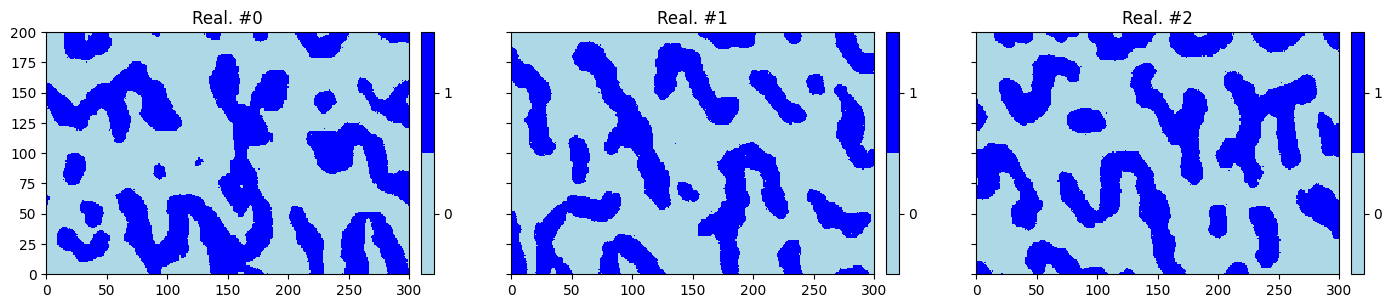

In [8]:
# Retrieve the realizations
sim = deesse_output['sim']

# Display
# -------
# Get colors for hard data (according to variable of index 3 in the point set, and color settings)
#hd_col = gn.imgplot.get_colors_from_values(hd.val[3], categ=True, categVal=categ_val, categCol=categ_col) 

plt.subplots(1, 3, figsize=(17,5), sharey=True)
for i in range(3):
    plt.subplot(1, 3, i+1) # select next sub-plot
    
    # Plot realization #i
    gn.imgplot.drawImage2D(sim[i], categ=True, categVal=categ_val, categCol=["lightblue", "blue"]) 
    # Add hard data points
 #   plt.scatter(hd.x(), hd.y(), marker='o', s=50, color=hd_col, edgecolors='black', linewidths=1)
    
    plt.title(f'Real. #{i}')

plt.show()